In [1]:
#%pip install -U pycocotools
#%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
#%pip install opencv-python

In [2]:
#!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'
#!python -m pip install -e detectron2

In [1]:
#dataDir = '.'
#dataType = '123'
annFile = './train/_annotations.coco.json'
imgDir= './train'
from pycocotools.coco import COCO
coco=COCO(annFile)
cats = coco.loadCats(coco.getCatIds())
categories = [cat['name'] for cat in cats]
print(f"Количество категорий: {len(categories)}")
# why 2 categories... I don't know
print()
print("Категории:")
print(categories)

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
Количество категорий: 2

Категории:
['diamonds-in-Minecraft', 'diamonds-in-Minecraft']


In [2]:
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import load_coco_json

import matplotlib.pyplot as plt
import cv2

dataset_name='123'
my_dataset = load_coco_json(json_file=annFile, image_root=imgDir , dataset_name=dataset_name)
dataset_metadata = MetadataCatalog.get(dataset_name)#.set(thing_classes=['diamonds-in-Minecraft'])#categories)
TOTAL_NUM_IMAGES = len(my_dataset)

print(f"Количество изображений: {TOTAL_NUM_IMAGES}")


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



Количество изображений: 120


In [6]:
print(MetadataCatalog.get(dataset_name).thing_classes)

['diamonds-in-Minecraft', 'diamonds-in-Minecraft']


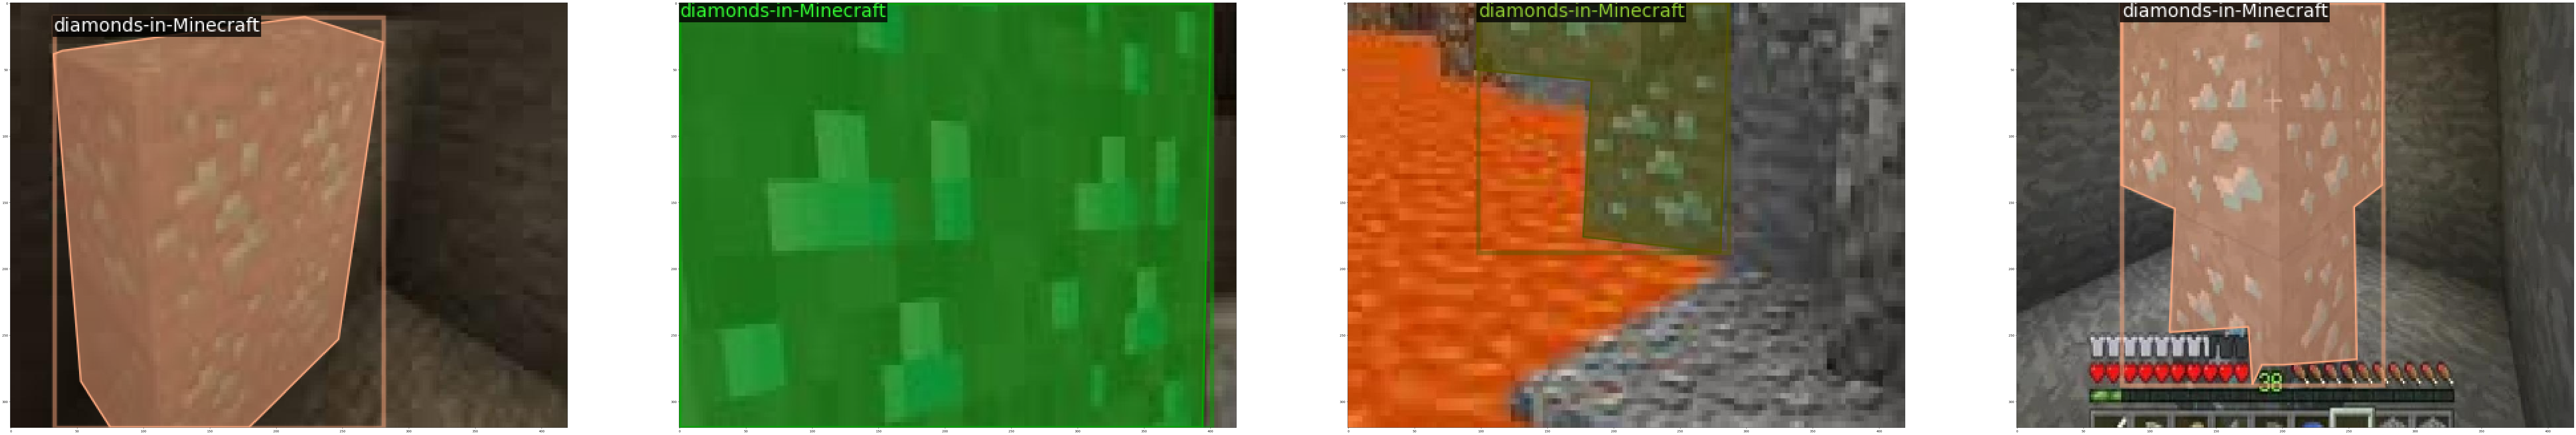

In [5]:
import random
from PIL import Image


n_x = 4
n_y = 1
number_of_samples = n_x*n_y
imgs = []
ids = random.sample([i for i in range(len(my_dataset))], number_of_samples)
for i in ids:
    element_id = i
    img = cv2.imread(my_dataset[element_id]["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=dataset_metadata, scale=0.5)
    out = visualizer.draw_dataset_dict(my_dataset[element_id])
    imgs.append(Image.fromarray(out.get_image()))
    
_, axs = plt.subplots(n_y, n_x, figsize=(150, 150))

# if I use 2 lists with diffrent length jupyter's core dies
for img, ax in zip(imgs, axs.flatten()):
#    ax.axis('off')
    ax.imshow(img)
plt.show()
